In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [2]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), SVR())
param_distrib = {'svr__kernel':['linear','rbf'],
                 "svr__gamma": loguniform(0.0001, 0.1),
                 "svr__C": loguniform(1, 1000) }
rnd_search_cv = RandomizedSearchCV(estimator = pipe,param_distributions=param_distrib,n_iter=10, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C41E90E820>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C41C4DA220>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42)

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
best_svr = rnd_search_cv.best_estimator_
print('最优超参数',rnd_search_cv.best_params_)
print(f"在训练集上的交叉验证分数(R^2):{rnd_search_cv.best_score_:.4f}")
print(f"在测试集上的得分(R^2):{best_svr.score(X_test,y_test):.4f}")
train_rmse = -cross_val_score(best_svr, X_train, y_train,
scoring="neg_root_mean_squared_error").mean()
print(f"在训练集上的rmse:{train_rmse:.4f}")
y_pred = best_svr.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False) 
print(f"在测试集上的rmse:{test_rmse:.4f}")

最优超参数 {'svr__C': 1.1527987128232398, 'svr__gamma': 0.08123245085588685, 'svr__kernel': 'rbf'}
在训练集上的交叉验证分数(R^2):0.7427
在测试集上的得分(R^2):0.7202
在训练集上的rmse:0.6044
在测试集上的rmse:0.6055


In [4]:
import joblib
joblib.dump(best_svr,'california_housing_svm.pkl')
model=joblib.load('california_housing_svm.pkl')
Ypred=model.predict(X_test[0:4]);
print(Ypred)

[0.62965689 1.67777369 3.14449163 2.42677263]


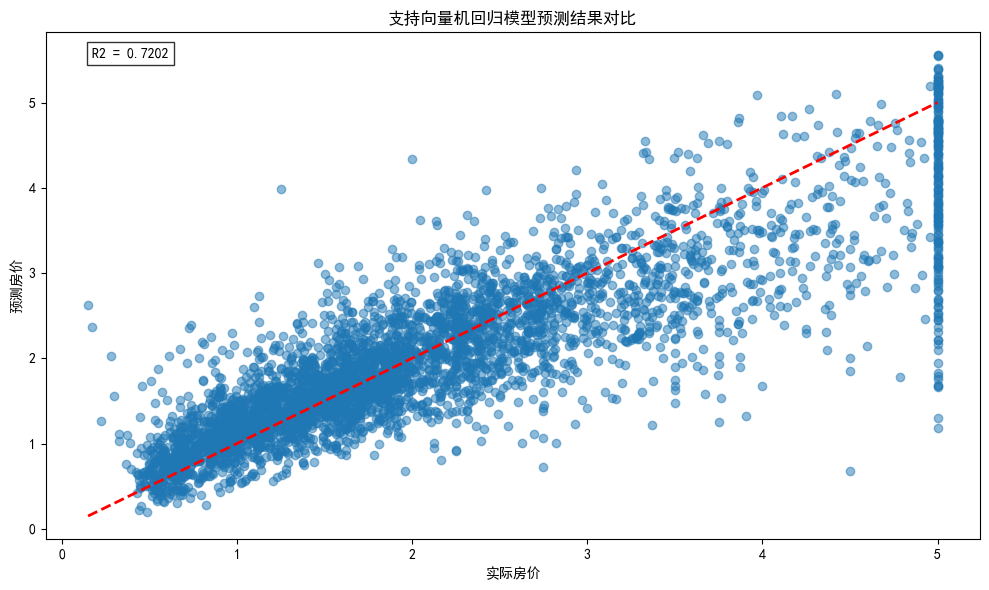

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号

# 获取测试集的预测值
y_pred = model.predict(X_test)

# 创建散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# 添加标签和标题
plt.xlabel('实际房价')
plt.ylabel('预测房价')
plt.title('支持向量机回归模型预测结果对比')

# 添加 R² 分数标注
r2_score = model.score(X_test, y_test)
plt.text(0.05, 0.95, f'R2 = {r2_score:.4f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()